In [1]:
pwd

'C:\\Users\\manga\\anaconda3'

In [2]:
import numpy as np

In [3]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv('indexProcessed.csv')

In [5]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [6]:
df.shape

(104224, 9)

In [7]:
# I shall work only with Index HSI
df=df[df.Index=="HSI"]

In [8]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [9]:
df.shape

(8492, 9)

In [10]:
# just to make the Date column in Year-Month-Day format
df['Date']=pd.to_datetime(df['Date'],dayfirst=True).dt.date
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.000000e+00,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.000000e+00,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.000000e+00,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.000000e+00,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.000000e+00,338.923013
...,...,...,...,...,...,...,...,...,...
8487,HSI,2021-05-25,28461.500000,28929.240230,28461.500000,28910.859380,28910.859380,2.352078e+09,3758.411719
8488,HSI,2021-05-26,29056.279300,29261.859380,29027.949220,29166.009770,29166.009770,2.518538e+09,3791.581270
8489,HSI,2021-05-27,28998.390630,29157.949220,28950.720700,29113.199220,29113.199220,3.804955e+09,3784.715899
8490,HSI,2021-05-28,29219.460940,29336.130860,29033.720700,29124.410160,29124.410160,2.591560e+09,3786.173321


In [11]:
#Variables for training
cols=list(df)[2:8]

In [12]:
#making the data columns into float
new_df = df[cols].astype(float)

In [13]:
new_df.head()

,Open,High,Low,Close,Adj Close,Volume
0,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0
1,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0
2,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0
3,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0
4,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0


<AxesSubplot:>

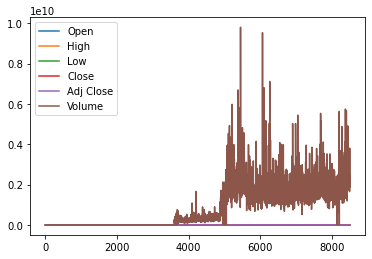

In [14]:
# Plotting of open, High, Low, Close, Adj Close, Volume
new_df.plot.line()

C:\Users\manga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

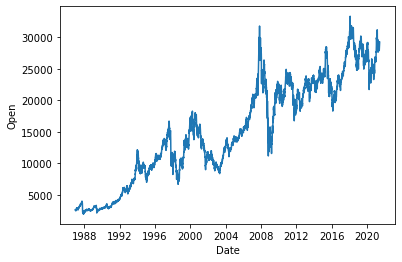

In [15]:
# Plotting of Opening price over time
import seaborn as sns
sns.lineplot(df["Date"],df["Open"])

C:\Users\manga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='High'>

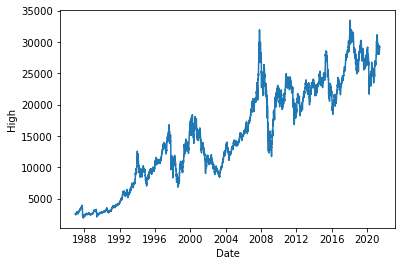

In [17]:
# Plotting of High price over the time
sns.lineplot(df["Date"],df["High"])

In [18]:
# Scaling the data
scaler= StandardScaler()
scaler= scaler.fit(new_df)
new_df_scaled=scaler.transform(new_df)
new_df_scaled

array([[-1.55375062, -1.55759439, -1.5505474 , -1.55450244, -1.55450244,
        -0.82036814],
       [-1.55721759, -1.56104338, -1.55403907, -1.55797266, -1.55797266,
        -0.82036814],
       [-1.55570542, -1.55953906, -1.55251613, -1.55645907, -1.55645907,
        -0.82036814],
       ...,
       [ 1.69562342,  1.69445319,  1.71608316,  1.71205173,  1.71205173,
         2.88235192],
       [ 1.7228023 ,  1.7162457 ,  1.72636009,  1.71343132,  1.71343132,
         1.70155902],
       [ 1.72353995,  1.70271021,  1.71098169,  1.71680195,  1.71680195,
         1.30940791]])

# Preparing the Data for training the model

In [18]:
trainX=[]
trainY=[]


In [19]:
#no of days we want to predict in future
n_future=1
# No of days we will use to predict the future
n_past=50

In [20]:
new_df.head(55)

,Open,High,Low,Close,Adj Close,Volume
0,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0
1,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0
2,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0
3,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0
4,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0
5,2603.300049,2603.300049,2603.300049,2603.300049,2603.300049,0.0
6,2561.699951,2561.699951,2561.699951,2561.699951,2561.699951,0.0
7,2614.899902,2614.899902,2614.899902,2614.899902,2614.899902,0.0
8,2590.800049,2590.800049,2590.800049,2590.800049,2590.800049,0.0
9,2578.199951,2578.199951,2578.199951,2578.199951,2578.199951,0.0


In [21]:
for i in range(n_past , len(new_df_scaled) -  n_future + 1):
    trainX.append(new_df_scaled[i-n_past:i, 0:new_df.shape[1]])
    trainY.append(new_df_scaled[i+ n_future-1:i+n_future,0])

In [22]:
trainX,trainY=np.array(trainX), np.array(trainY)

In [23]:
trainX

array([[[-1.55375062, -1.55759439, -1.5505474 , -1.55450244,
         -1.55450244, -0.82036814],
        [-1.55721759, -1.56104338, -1.55403907, -1.55797266,
         -1.55797266, -0.82036814],
        [-1.55570542, -1.55953906, -1.55251613, -1.55645907,
         -1.55645907, -0.82036814],
        ...,
        [-1.53007197, -1.53403846, -1.52669998, -1.53080154,
         -1.53080154, -0.82036814],
        [-1.53139972, -1.53535933, -1.52803719, -1.53213054,
         -1.53213054, -0.82036814],
        [-1.53495277, -1.53889396, -1.53161557, -1.53568693,
         -1.53568693, -0.82036814]],

       [[-1.55721759, -1.56104338, -1.55403907, -1.55797266,
         -1.55797266, -0.82036814],
        [-1.55570542, -1.55953906, -1.55251613, -1.55645907,
         -1.55645907, -0.82036814],
        [-1.55183274, -1.55568645, -1.54861585, -1.55258275,
         -1.55258275, -0.82036814],
        ...,
        [-1.53139972, -1.53535933, -1.52803719, -1.53213054,
         -1.53213054, -0.82036814],
  

In [24]:
trainX.shape

(8442, 50, 6)

In [25]:
trainY

array([[-1.54129657],
       [-1.54625115],
       [-1.53460853],
       ...,
       [ 1.69562342],
       [ 1.7228023 ],
       [ 1.72353995]])

In [26]:
trainY.shape

(8442, 1)

# building the model

In [27]:
model = Sequential()
model.add(LSTM(64,activation="relu",input_shape=(trainX.shape[1],trainX.shape[2]), return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer="adam", loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            18176     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [28]:
history=model.fit(trainX , trainY, epochs=10,batch_size=16, validation_split=0.1)

Epoch 1/10
475/475 [==============================] - 51s 97ms/step - loss: 0.0583 - val_loss: 0.0077 ETA: 0s - lo
Epoch 2/10
475/475 [==============================] - 51s 107ms/step - loss: 0.0243 - val_loss: 0.0060
Epoch 3/10
475/475 [==============================] - 49s 104ms/step - loss: 0.0209 - val_loss: 0.0075
Epoch 4/10
475/475 [==============================] - 50s 105ms/step - loss: 0.0225 - val_loss: 0.0115
Epoch 5/10
475/475 [==============================] - 51s 107ms/step - loss: 0.0212 - val_loss: 0.0279
Epoch 6/10
475/475 [==============================] - 52s 110ms/step - loss: 0.0205 - val_loss: 0.0122
Epoch 7/10
475/475 [==============================] - 55s 115ms/step - loss: 0.0212 - val_loss: 0.0045
Epoch 8/10
475/475 [==============================] - 55s 116ms/step - loss: 0.0217 - val_loss: 0.0094
Epoch 9/10
475/475 [==============================] - 53s 112ms/step - loss: 0.0204 - val_loss: 0.0024
Epoch 10/10
475/475 [==============================] - 52s 11

In [29]:
train_dates=df["Date"]
future=200
forecast_period_dates=pd.date_range(list(train_dates)[-1], periods=future,freq="1d").tolist()

# Predicting the future

In [30]:
forecast=model.predict(trainX[-future:])
forecast

array([[1.1763501 ],
       [1.1631975 ],
       [1.1359968 ],
       [1.1462679 ],
       [1.168227  ],
       [1.1927917 ],
       [1.1966529 ],
       [1.2160573 ],
       [1.2185116 ],
       [1.2048175 ],
       [1.1962309 ],
       [1.1785452 ],
       [1.192599  ],
       [1.2075529 ],
       [1.2174032 ],
       [1.2232876 ],
       [1.2346232 ],
       [1.2595918 ],
       [1.2233226 ],
       [1.2158599 ],
       [1.1997058 ],
       [1.2045939 ],
       [1.1645117 ],
       [1.1538746 ],
       [1.13483   ],
       [1.1183627 ],
       [1.1145475 ],
       [1.1188633 ],
       [1.1416209 ],
       [1.147284  ],
       [1.14378   ],
       [1.1468179 ],
       [1.1182387 ],
       [1.0830657 ],
       [1.0597134 ],
       [1.0363545 ],
       [1.0143907 ],
       [1.0013499 ],
       [0.99774474],
       [1.0016155 ],
       [1.0177746 ],
       [1.0340989 ],
       [1.0575764 ],
       [1.0684154 ],
       [1.0796607 ],
       [1.1165595 ],
       [1.1468506 ],
       [1.136

In [31]:
forecast.shape

(200, 1)

In [32]:
forecast_copies=np.repeat(forecast,new_df.shape[1],axis=-1)
forecast_copies

array([[1.1763501, 1.1763501, 1.1763501, 1.1763501, 1.1763501, 1.1763501],
       [1.1631975, 1.1631975, 1.1631975, 1.1631975, 1.1631975, 1.1631975],
       [1.1359968, 1.1359968, 1.1359968, 1.1359968, 1.1359968, 1.1359968],
       ...,
       [1.6461697, 1.6461697, 1.6461697, 1.6461697, 1.6461697, 1.6461697],
       [1.7004578, 1.7004578, 1.7004578, 1.7004578, 1.7004578, 1.7004578],
       [1.6708062, 1.6708062, 1.6708062, 1.6708062, 1.6708062, 1.6708062]],
      dtype=float32)

In [33]:
forecast_copies.shape

(200, 6)

In [34]:
y_pred_future=scaler.inverse_transform(forecast_copies)[ : ,0]
y_pred_future

array([24774.672, 24667.691, 24446.443, 24529.986, 24708.6  , 24908.406,
       24939.812, 25097.646, 25117.61 , 25006.225, 24936.38 , 24792.527,
       24906.84 , 25028.473, 25108.594, 25156.457, 25248.66 , 25451.752,
       25156.742, 25096.041, 24964.646, 25004.404, 24678.38 , 24591.86 ,
       24436.951, 24303.008, 24271.977, 24307.08 , 24492.188, 24538.252,
       24509.75 , 24534.46 , 24302.   , 24015.906, 23825.96 , 23635.963,
       23457.31 , 23351.238, 23321.914, 23353.398, 23484.834, 23617.615,
       23808.578, 23896.742, 23988.21 , 24288.342, 24534.727, 24448.908,
       24463.453, 24692.469, 24546.277, 24559.984, 24671.64 , 24760.984,
       24793.82 , 24720.299, 24590.113, 24500.236, 24444.834, 24587.033,
       24731.998, 25136.625, 25429.52 , 25730.799, 26278.266, 26610.377,
       26419.875, 26178.32 , 26098.55 , 26205.441, 26288.395, 26315.648,
       26290.488, 26338.82 , 26348.896, 26609.754, 26552.879, 26732.959,
       27198.553, 26970.105, 26841.031, 26655.24 , 

In [35]:
y_pred_future=scaler.inverse_transform(forecast_copies)[ : ,0]
y_pred_future

array([24774.672, 24667.691, 24446.443, 24529.986, 24708.6  , 24908.406,
       24939.812, 25097.646, 25117.61 , 25006.225, 24936.38 , 24792.527,
       24906.84 , 25028.473, 25108.594, 25156.457, 25248.66 , 25451.752,
       25156.742, 25096.041, 24964.646, 25004.404, 24678.38 , 24591.86 ,
       24436.951, 24303.008, 24271.977, 24307.08 , 24492.188, 24538.252,
       24509.75 , 24534.46 , 24302.   , 24015.906, 23825.96 , 23635.963,
       23457.31 , 23351.238, 23321.914, 23353.398, 23484.834, 23617.615,
       23808.578, 23896.742, 23988.21 , 24288.342, 24534.727, 24448.908,
       24463.453, 24692.469, 24546.277, 24559.984, 24671.64 , 24760.984,
       24793.82 , 24720.299, 24590.113, 24500.236, 24444.834, 24587.033,
       24731.998, 25136.625, 25429.52 , 25730.799, 26278.266, 26610.377,
       26419.875, 26178.32 , 26098.55 , 26205.441, 26288.395, 26315.648,
       26290.488, 26338.82 , 26348.896, 26609.754, 26552.879, 26732.959,
       27198.553, 26970.105, 26841.031, 26655.24 , 

In [36]:
forecast_dates=[]
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [37]:
forecast_dates

[datetime.date(2021, 5, 31),
 datetime.date(2021, 6, 1),
 datetime.date(2021, 6, 2),
 datetime.date(2021, 6, 3),
 datetime.date(2021, 6, 4),
 datetime.date(2021, 6, 5),
 datetime.date(2021, 6, 6),
 datetime.date(2021, 6, 7),
 datetime.date(2021, 6, 8),
 datetime.date(2021, 6, 9),
 datetime.date(2021, 6, 10),
 datetime.date(2021, 6, 11),
 datetime.date(2021, 6, 12),
 datetime.date(2021, 6, 13),
 datetime.date(2021, 6, 14),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 18),
 datetime.date(2021, 6, 19),
 datetime.date(2021, 6, 20),
 datetime.date(2021, 6, 21),
 datetime.date(2021, 6, 22),
 datetime.date(2021, 6, 23),
 datetime.date(2021, 6, 24),
 datetime.date(2021, 6, 25),
 datetime.date(2021, 6, 26),
 datetime.date(2021, 6, 27),
 datetime.date(2021, 6, 28),
 datetime.date(2021, 6, 29),
 datetime.date(2021, 6, 30),
 datetime.date(2021, 7, 1),
 datetime.date(2021, 7, 2),
 datetime.date(2021, 7, 3),
 datetime.date(2021, 7, 4)

In [38]:
df_forecast=pd.DataFrame({'Date':np.array(forecast_dates),"open":y_pred_future})

# visuals

C:\Users\manga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\manga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

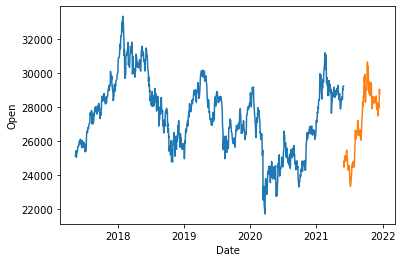

In [39]:

sns.lineplot(df["Date"].tail(1000),df["Open"].tail(1000))
sns.lineplot(df_forecast["Date"],y_pred_future)